# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import matplotlib.pyplot as plt
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256

In [7]:
results = {}
for lr in LEARNING_RATE:
    for item in ['SGD','RMSprop','Adagrad','Adam']:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        model = build_mlp(input_shape=x_train.shape[1:])
        if item=='SGD':
            optimizer = keras.optimizers.SGD(lr=lr)
        elif item=='RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        elif item=='Adagrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)
        elif item=='Adam':
            optimizer = keras.optimizers.Adam(lr=lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
        print('Training with lr='+str(lr)+', optimizer='+item)
        model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True)
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "lr:%s optimizer:%s" % (str(lr), item)
        print(exp_name_tag)
        results[exp_name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}








Training with lr=0.1, optimizer=SGD
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/50





50000/50000 [==============================] - 16s 311us/step - loss: 2.0531 - acc: 0.2539 - val_loss: 1.8833 - val_acc: 0.3124
Epoch 2/50
50000/50000 [==============================] - 14s 273us/step - loss: 1.8324 - acc: 0.3426 - val_loss: 1.7997 - val_acc: 0.3445
Epoch 3/50
50000/50000 [==============================] - 14s 282us/step - loss: 1.7445 - acc: 0.3753 - val_loss: 1.7700 - val_acc: 0.3512
Epoch 4/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.6767 - acc: 0.4011 - val_loss: 1.7979 - val_acc: 0.3506
Epoch 5/50
50000/50000 [==============================] - 17s 331us/step - loss: 1.6390 - acc: 0.4160 - val_loss: 1.6043 - val_acc: 0.4277
Epoch 6/50
50000/50000 [==============================] - 21s 411us/step - loss: 1.5943 - acc: 0.4312 - val_lo

50000/50000 [==============================] - 10s 199us/step - loss: 1.0334 - acc: 0.6325 - val_loss: 1.4383 - val_acc: 0.5086
Epoch 35/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.0166 - acc: 0.6357 - val_loss: 1.5469 - val_acc: 0.4868
Epoch 36/50
50000/50000 [==============================] - 9s 189us/step - loss: 0.9980 - acc: 0.6442 - val_loss: 1.5357 - val_acc: 0.4861
Epoch 37/50
50000/50000 [==============================] - 10s 197us/step - loss: 0.9899 - acc: 0.6488 - val_loss: 1.5516 - val_acc: 0.4875
Epoch 38/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.9749 - acc: 0.6525 - val_loss: 1.5833 - val_acc: 0.4857
Epoch 39/50
50000/50000 [==============================] - 9s 188us/step - loss: 0.9544 - acc: 0.6598 - val_loss: 1.5316 - val_acc: 0.4802
Epoch 40/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.9365 - acc: 0.6652 - val_loss: 1.5748 - val_acc: 0.4799
Epoch 41/50
50000/50000 [==========

50000/50000 [==============================] - 17s 342us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 17s 331us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 18s 357us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 25s 496us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 25s 494us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 27s 545us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 27s 531us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/

50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
lr:0.1 optimizer:Adagrad
Training with lr=0.1, optimizer=Adam
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 212us/step - loss: 14.4455 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 193us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 187us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================]

50000/50000 [==============================] - 8s 164us/step - loss: 1.7706 - acc: 0.3784 - val_loss: 1.9416 - val_acc: 0.3220
Epoch 5/50
50000/50000 [==============================] - 8s 167us/step - loss: 1.7406 - acc: 0.3884 - val_loss: 1.7877 - val_acc: 0.3520
Epoch 6/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.7063 - acc: 0.4009 - val_loss: 1.7270 - val_acc: 0.3866
Epoch 7/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.6833 - acc: 0.4103 - val_loss: 1.6959 - val_acc: 0.4065
Epoch 8/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6571 - acc: 0.4157 - val_loss: 1.7078 - val_acc: 0.3921
Epoch 9/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.6337 - acc: 0.4267 - val_loss: 1.6421 - val_acc: 0.4187
Epoch 10/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.6159 - acc: 0.4313 - val_loss: 1.7817 - val_acc: 0.3763
Epoch 11/50
50000/50000 [==================

Epoch 12/50
50000/50000 [==============================] - 8s 164us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 8s 165us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 8s 169us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 9s 174us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 9s 179us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 10s 210us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50


50000/50000 [==============================] - 8s 169us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 8s 168us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 9s 171us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 8s 166us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 9s 172us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 8s 167us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [

50000/50000 [==============================] - 10s 191us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==============================] - 10s 204us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 10s 210us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 10s 200us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 10s 192us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 10s 192us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 10s 195us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/

Epoch 34/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.7467 - acc: 0.3913 - val_loss: 1.7473 - val_acc: 0.3919
Epoch 35/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.7419 - acc: 0.3935 - val_loss: 1.7433 - val_acc: 0.3929
Epoch 36/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.7373 - acc: 0.3956 - val_loss: 1.7392 - val_acc: 0.3919
Epoch 37/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.7325 - acc: 0.3966 - val_loss: 1.7329 - val_acc: 0.3986
Epoch 38/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.7281 - acc: 0.3990 - val_loss: 1.7289 - val_acc: 0.3981
Epoch 39/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.7238 - acc: 0.4007 - val_loss: 1.7239 - val_acc: 0.3999
Epoch 40/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.7196 - acc: 0.4019 - val_loss: 1.7224 - val_acc: 0.3953
Epoch 41/50
50000/50000 [==

50000/50000 [==============================] - 9s 186us/step - loss: 0.8710 - acc: 0.6872 - val_loss: 1.7929 - val_acc: 0.4915
Epoch 43/50
50000/50000 [==============================] - 9s 184us/step - loss: 0.8565 - acc: 0.6933 - val_loss: 1.7930 - val_acc: 0.4878
Epoch 44/50
50000/50000 [==============================] - 9s 190us/step - loss: 0.8413 - acc: 0.6968 - val_loss: 1.7927 - val_acc: 0.4935
Epoch 45/50
50000/50000 [==============================] - 9s 186us/step - loss: 0.8294 - acc: 0.7034 - val_loss: 1.8307 - val_acc: 0.4811
Epoch 46/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.8163 - acc: 0.7077 - val_loss: 1.8969 - val_acc: 0.4766
Epoch 47/50
50000/50000 [==============================] - 10s 193us/step - loss: 0.8055 - acc: 0.7122 - val_loss: 1.8761 - val_acc: 0.4836
Epoch 48/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.7903 - acc: 0.7162 - val_loss: 1.8749 - val_acc: 0.4908
Epoch 49/50
50000/50000 [===========

50000/50000 [==============================] - 10s 196us/step - loss: 1.2599 - acc: 0.5623 - val_loss: 1.3982 - val_acc: 0.5097
lr:0.001 optimizer:Adagrad
Training with lr=0.001, optimizer=Adam
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 233us/step - loss: 1.9245 - acc: 0.3039 - val_loss: 1.7921 - val_acc: 0.3651
Epoch 2/50
50000/50000 [==============================] - 11s 230us/step - loss: 1.7010 - acc: 0.3928 - val_loss: 1.6314 - val_acc: 0.4159
Epoch 3/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.6111 - acc: 0.4256 - val_loss: 1.6080 - val_acc: 0.4152
Epoch 4/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.5530 - acc: 0.4449 - val_loss: 1.5490 - val_acc: 0.4489s - loss: 1.
Epoch 5/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.5019 - acc: 0.4640 - val_loss: 1.5312 - val_acc: 0.4569
Epoch 6/50
50000/50000 [=========================

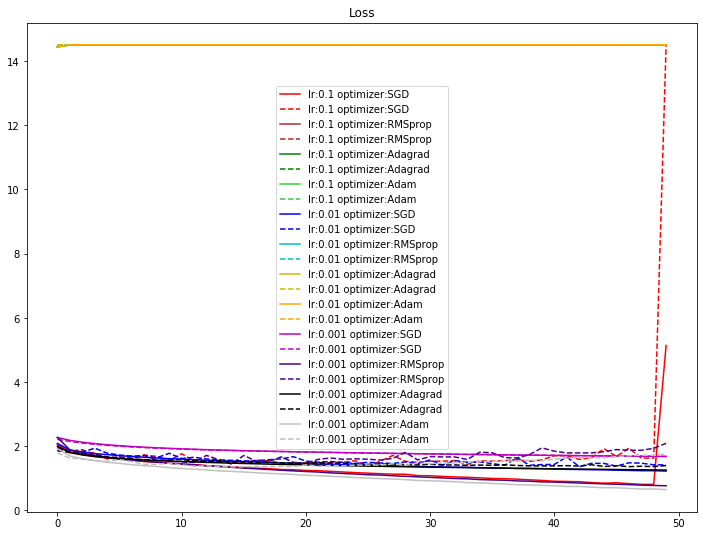

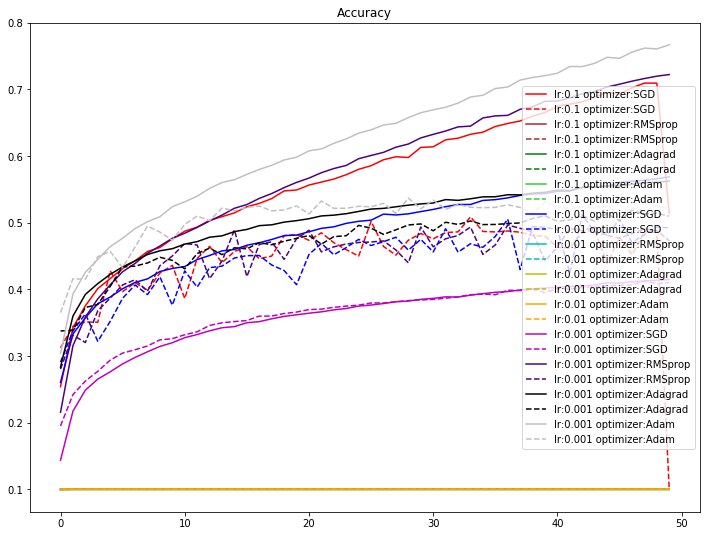

In [8]:
%matplotlib inline
color_bar = ["r", "brown", "g", "limegreen", "b", "c", "y", "orange", "m", "indigo", "k", "silver"]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()